In [ ]:
!pip install numpy pandas matplotlib scikit-learn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


DATASET_PATH = 'china_population.csv'

In [5]:
data = pd.read_csv(DATASET_PATH)

data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,China Global Rank
0,2020,1439323776,0.39,5540090,-348399,38.4,1.69,153,60.8,875075919,18.47,7794798739,1
1,2019,1433783686,0.43,6135900,-348399,37.0,1.65,153,59.7,856409297,18.59,7713468100,1
2,2018,1427647786,0.47,6625995,-348399,37.0,1.65,152,58.6,837022095,18.71,7631091040,1
3,2017,1421021791,0.49,6972440,-348399,37.0,1.65,151,57.5,816957613,18.83,7547858925,1
4,2016,1414049351,0.51,7201481,-348399,37.0,1.65,151,56.3,796289491,18.94,7464022049,1


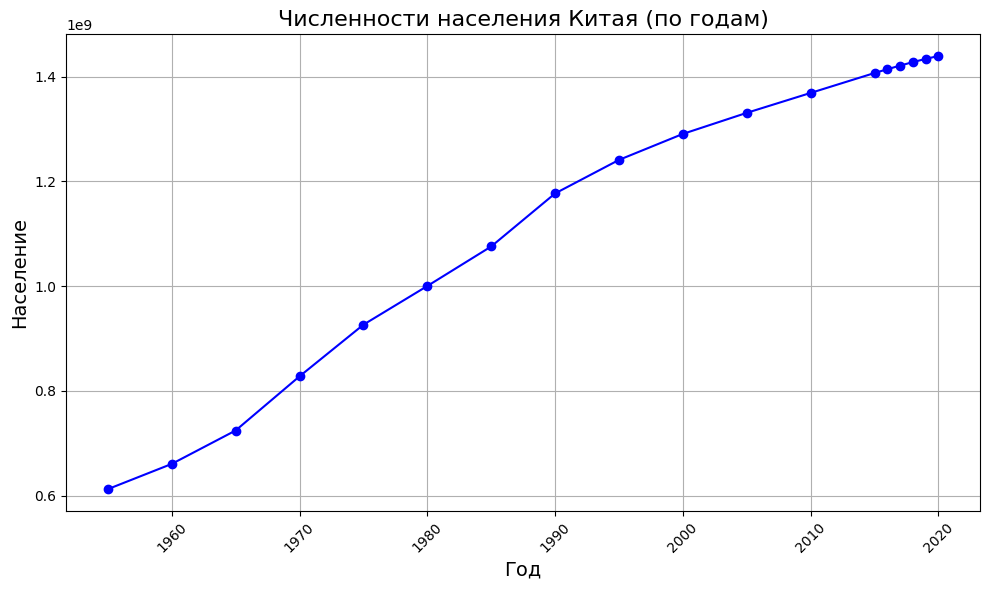

In [6]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Population'], marker='o', linestyle='-', color='blue')

plt.title('Численности населения Китая (по годам)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Население', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Отображение графика
plt.tight_layout()
plt.show()

In [7]:
# Объединение признаков в один двумерный массив и их состовление
X = np.hstack((data['Year'].values.reshape(-1, 1), data['Density (P/Km²)'].values.reshape(-1, 1), data['World Population'].values.reshape(-1, 1)))
y = data['Population'].values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# Обучение LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_scaled)

# Метрики качества
# Mean Squared Error (MSE) - Среднеквадратическая ошибка -
# Это мера, которая измеряет среднеквадратичное отклонение между
# фактическими значениями (вашими реальными данными)
# и предсказанными значениями, полученными вашей моделью.
mse = mean_squared_error(y_test, y_pred)

# R-squared (R2) - Коэффициент детерминации, R2 принимает значения от 0 до 1.
# Показывает изменчивость в данных.
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 10564123112577.559
R-squared (R2): 0.9970850057833618


In [10]:
# Обучение Lasso
model = Lasso(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 16902956206464.402
R-squared (R2): 0.99533591013084


/Users/yaroslav/PycharmProjects/Belhard_DataScience/Lesson_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+14, tolerance: 1.145e+14
  model = cd_fast.enet_coordinate_descent(


In [11]:
# Обучение Ridge
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 699175204378831.0
R-squared (R2): 0.8070742213563786


In [12]:
# Обучение ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 651595658149479.1
R-squared (R2): 0.8202030064539038


По результатам тестов, можно сказать, что наилучшую метрику дала модель LinearRegression